# Plane Waves  
$$U(z,t)=U_0 e^{j(\omega t-kz)}$$where  
· $U_0$ is the amplitude of the wave,  
· $\omega$ is the angular frequency,  
· $k$ is the wave number,  
· $t$ is the time,  
· $z$ is the position along the direction of propagation,  
· $j$ is the imaginary unit.  aginary unit.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
c = 3e8  # Speed of light in vacuum (m/s)
epsilon_0 = 8.854e-12  # Permittivity of free space (F/m)

In [6]:
# Plane wave parameters
A_0 = 1.0  # Amplitude of the wave (V/m)
lambda_wave = 500e-9  # Wavelength (m)
k = 2 * np.pi / lambda_wave  # Wave number (1/m)
omega = c * k  # Angular frequency (rad/s)
phi = 0  # Phase (rad)

# Define the plane wave function
def plane_wave(x, t, A, k, omega):
    return A * np.exp(1j * (k * x - omega * t))

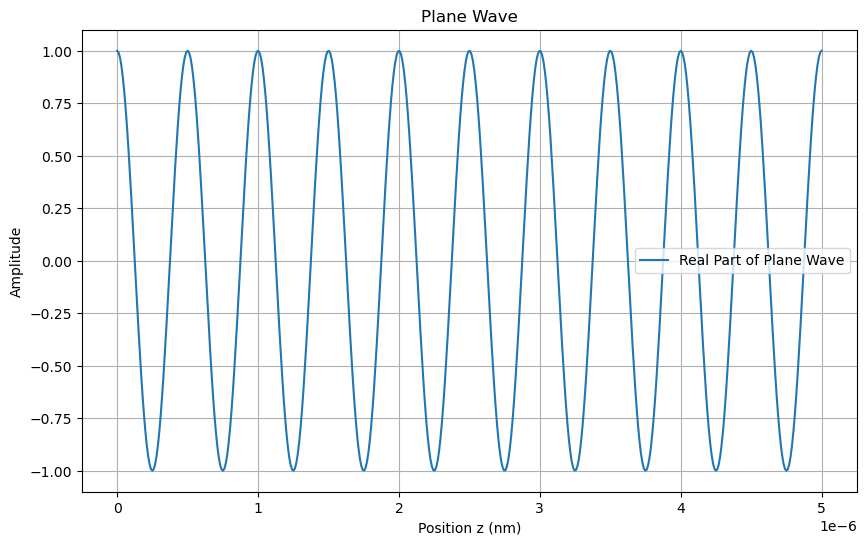

In [7]:
# Define the spatial and temporal domains
z = np.linspace(0, 10 * lambda_wave, 500)  # Spatial domain (nm)
t = 0  # Time 

# Calculate the plane wave
U = plane_wave(z, t, A_0, k, omega)

# Plot the real part of the plane wave
plt.figure(figsize=(10, 6))
plt.plot(z, np.real(U), label='Real Part of Plane Wave')
plt.xlabel('Position z (nm)')
plt.ylabel('Amplitude')
plt.title('Plane Wave')
plt.legend()
plt.grid(True)
plt.show()


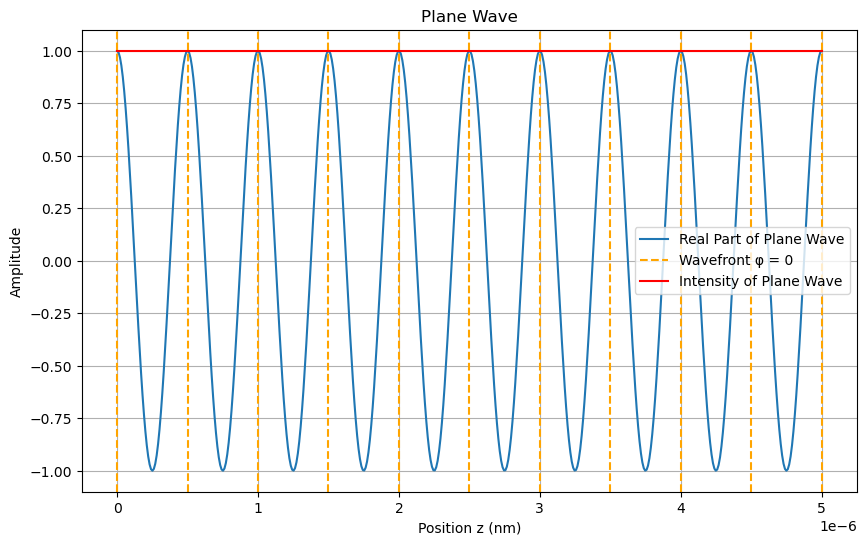

In [8]:
# Plot the real part of the plane wave
plt.figure(figsize=(10, 6))
plt.plot(z, np.real(U), label='Real Part of Plane Wave')

# Add dashed lines for wavefronts (phase φ = 0)
wavefront_positions = [(2 * n * np.pi + omega * t) / k for n in range(0, 11)]
for pos in wavefront_positions:
    plt.axvline(x=pos, color='orange', linestyle='--', label='Wavefront φ = 0' if pos == wavefront_positions[0] else "")

I = np.abs(U)**2
# Plot the intensity of the plane wave
plt.plot(z, I, label='Intensity of Plane Wave', color='r')

plt.xlabel('Position z (nm)')
plt.ylabel('Amplitude')
plt.title('Plane Wave')
plt.legend()
plt.grid(True)
plt.show()



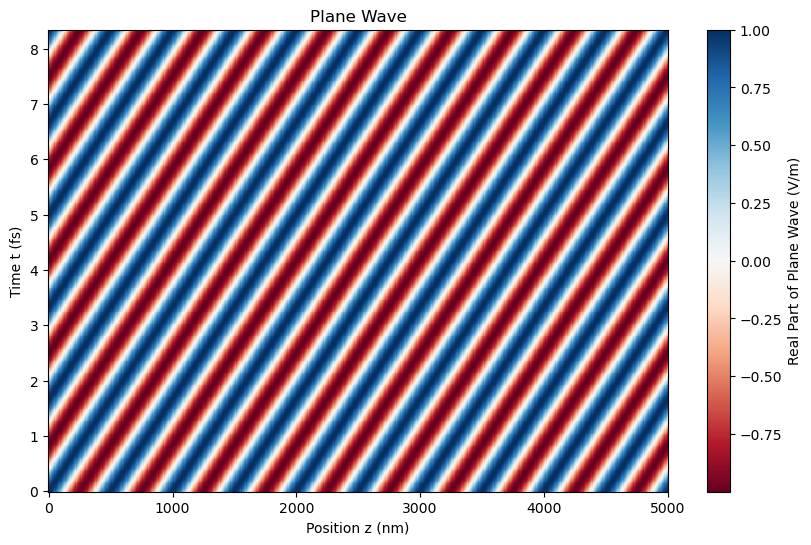

In [9]:
# Spatial and temporal coordinates
z = np.linspace(0, 10 * lambda_wave, 500)
t = np.linspace(0, 1 / (0.2 * c / lambda_wave), 500)
Z, T = np.meshgrid(z, t)

U2 = plane_wave(Z, T, A_0, k, omega)
E = np.real(U2)

# Plot the electric field
plt.figure(figsize=(10, 6))
plt.pcolormesh(Z * 1e9, T * 1e15, E, shading='auto', cmap='RdBu')
plt.colorbar(label='Real Part of Plane Wave (V/m)')
plt.xlabel('Position z (nm)')
plt.ylabel('Time t (fs)')
plt.title('Plane Wave')
plt.show()

# Spherical Waves  
$$U(R,t)=\frac{U_0}{R} e^{j(\omega t-kR)}$$

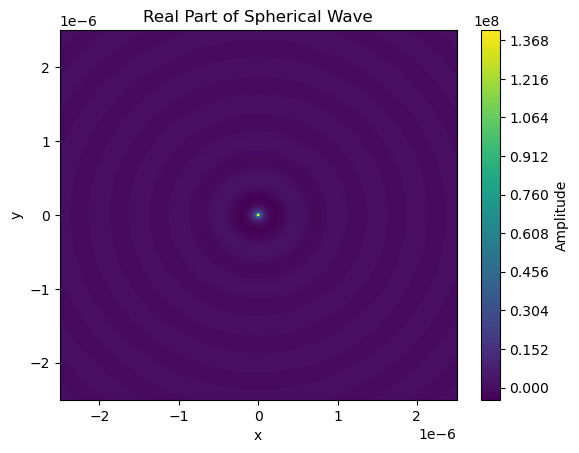

In [10]:
A_0 = 1.0  # Amplitude of the wave (V/m)
lambda_wave = 500e-9  # Wavelength (m)
k = 2 * np.pi / lambda_wave  # Wave number (1/m)
omega = c * k  # Angular frequency (rad/s)
phi = 0  # Phase (rad)

# Define the spherical wave function
def spherical_wave(r, t, A, k, omega):
    return (A / r) * np.exp(1j * (omega * t - k * r)) 
# Define the spatial domain
x = np.linspace(-5 * lambda_wave, 5 * lambda_wave, 500)
y = np.linspace(-5 * lambda_wave, 5 * lambda_wave, 500)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)

# Define the time
t = 0  # Time

# Calculate the spherical wave
U = spherical_wave(R, t, A_0, k, omega)
# Plot the real part of the spherical wave
plt.figure()
plt.contourf(X, Y, np.real(U), levels=200, cmap='viridis')
plt.colorbar(label='Amplitude')        
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Part of Spherical Wave')
plt.show()

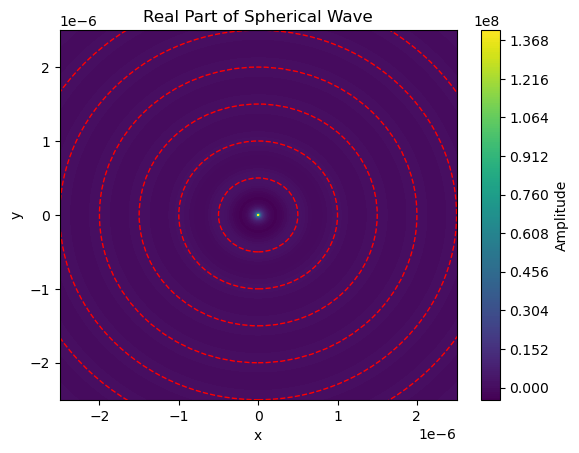

In [11]:
# Plot wavefronts at different radial distances
plt.figure()
plt.contourf(X, Y, np.real(U), levels=200, cmap='viridis')
plt.colorbar(label='Amplitude')

# Add dashed circles for wavefronts (phase φ = 0)
wavefront_radii = [(2 * n * np.pi + omega * t) / k for n in range(0, 7)]
for radius in wavefront_radii:
    if radius < 5* np.sqrt(2) * lambda_wave:
        circle = plt.Circle((0, 0), radius, color='r', linestyle='--', fill=False, label='Wavefront φ = 0' if radius == wavefront_radii[0] else "")
        plt.gca().add_artist(circle)
        
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Part of Spherical Wave')
plt.show()

In [12]:
# get rid of (A / r) in spherical wave
def spherical_wave_modified(r, t, A, k, omega):
    return np.exp(1j * (omega * t - k * r)) 

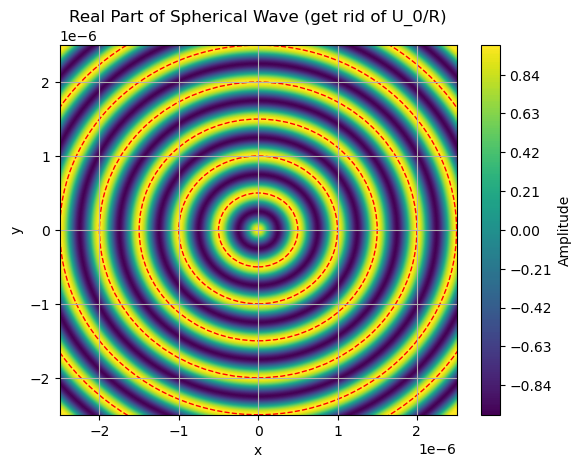

In [13]:
# Calculate the spherical wave
U2 = spherical_wave_modified(R, t, A_0, k, omega)

# Plot the real part of the spherical wave
plt.figure()
plt.contourf(X, Y, np.real(U2), levels=200, cmap='viridis')
plt.colorbar(label='Amplitude')

# Add dashed circles for wavefronts (phase φ = 0)
wavefront_radii = [(2 * n * np.pi + omega * t) / k for n in range(0, 7)]
for radius in wavefront_radii:
    if radius < 5* np.sqrt(2) * lambda_wave:
        circle = plt.Circle((0, 0), radius, color='r', linestyle='--', fill=False, label='Wavefront φ = 0' if radius == wavefront_radii[0] else "")
        plt.gca().add_artist(circle)
        

plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Part of Spherical Wave (get rid of U_0/R)')
plt.grid(True)
plt.show()


# Reflection and Refraction

In [29]:
# Parameters for the plane wave
A = 1  # Amplitude
k = 2 * np.pi  # Wave number (assuming wavelength λ=1)
theta_1 = np.pi / 6  # Angle of incidence in radians (30 degrees)

# Define the plane wave functions
def wave(x, z, t, A, k, theta_1, omega):
    return A * np.exp(1j * (k * (x * np.sin(theta_1) + z * np.cos(theta_1)) - omega * t))
# Define the incident wave function

# Define the spatial and temporal domains
x = np.linspace(-10, 10, 500)  # Spatial domain
z = np.linspace(0, 10, 250)  # Spatial domain
X, Z = np.meshgrid(x, z)
t = 0  # Time

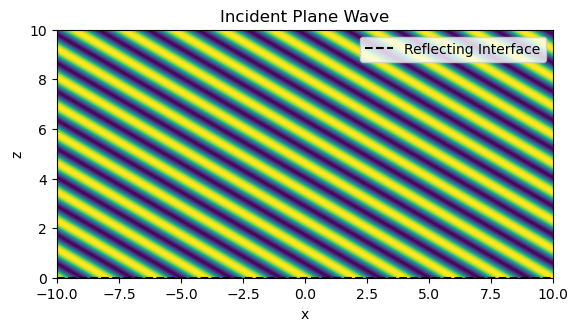

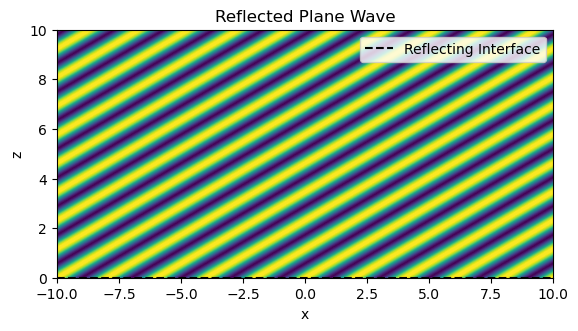

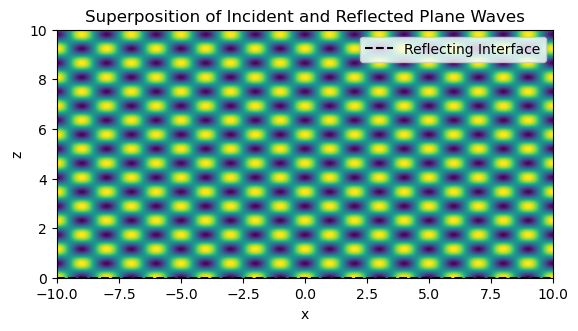

In [30]:
# Calculate the incident and reflected waves
U_incident = wave(X, Z, t, A, k, theta_1, omega=2 * np.pi)
U_reflected = wave(X, Z, t, A, k, np.pi-theta_1, omega=2 * np.pi)

# Plot the real part of the incident wave
plt.figure()
plt.contourf(X, Z, np.real(U_incident), levels=100, cmap='viridis')
plt.title('Incident Plane Wave')
plt.xlabel('x')
plt.ylabel('z')
plt.axhline(y=0, color='k', linestyle='--', label='Reflecting Interface')  # Mirror line
plt.legend()
plt.axis('scaled')
plt.show()

# Plot the real part of the reflected wave
plt.figure()
plt.contourf(X, Z, np.real(U_reflected), levels=100, cmap='viridis')
plt.title('Reflected Plane Wave')
plt.xlabel('x')
plt.ylabel('z')
plt.axhline(y=0, color='k', linestyle='--', label='Reflecting Interface')  # Mirror line
plt.legend()
plt.axis('scaled')
plt.show()

# Plot the superposition of the incident and reflected waves
plt.figure()
plt.contourf(X, Z, np.real(U_incident + U_reflected), levels=100, cmap='viridis')
plt.title('Superposition of Incident and Reflected Plane Waves')
plt.xlabel('x')
plt.ylabel('z')
plt.axhline(y=0, color='k', linestyle='--', label='Reflecting Interface')  # Mirror line
plt.legend()
plt.axis('scaled')
plt.show()

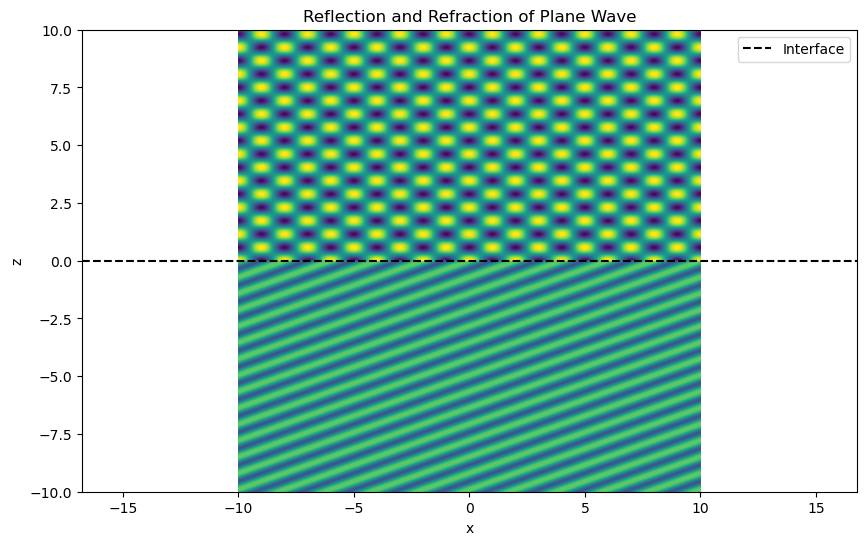

In [22]:
# Parameters for the wave
k_0 = 2 * np.pi  # Wave number in vacuum (assuming wavelength λ=1)
omega = 2 * np.pi  # Angular frequency (assuming period T=1)
theta_1 = np.pi / 6  # Angle of incidence (30 degrees)
n1 = 1.0  # Refractive index of medium 1 (air)
n2 = 1.5  # Refractive index of medium 2 (glass)

# Define the spatial and temporal domains
x = np.linspace(-10, 10, 500)  # Spatial domain
z = np.linspace(10, 10, 250)  # Spatial domain
X, Z = np.meshgrid(x, z)
t = 0  # Time

# Calculate the angles using Snell's law
theta_2 = theta_1  # Angle of reflection (equal to angle of incidence)
theta_3 = np.arcsin(n1 * np.sin(theta_1) / n2)  # Angle of refraction

# Wave vector components
kx = k_0 * n1 * np.sin(theta_1)
kz = k_0 * n1 * np.cos(theta_1)
k_prime_x = k_0 * n1 * np.sin(theta_2)
k_prime_z = -k_0 * n1 * np.cos(theta_2)
k_double_prime_x = k_0 * n2 * np.sin(theta_3)
k_double_prime_z = -k_0 * n2 * np.cos(theta_3)

# Define the wave function
def wave(x, z, t, A, kx, kz, omega):
    return A * np.exp(1j * (kx * x + kz * z - omega * t))

# Define the spatial domain
x = np.linspace(-10, 10, 500)
z = np.linspace(-10, 10, 500)
X, Z = np.meshgrid(x, z)

# Define the time
t = 0  # Time

# Calculate the incident, reflected, and refracted waves
U_inc = wave(X, Z, t, A, kx, kz, omega)
U_ref = wave(X, Z, t, A, k_prime_x, k_prime_z, omega)
U_refr = wave(X, Z, t, A, k_double_prime_x, k_double_prime_z, omega)

# Calculate the total wave (superposition of incident and reflected waves)
U_total = np.where(Z >= 0, U_inc + U_ref, U_refr)

# Plot the real part of the total wave
plt.figure(figsize=(10, 6))
plt.contourf(X, Z, np.real(U_total), levels=100, cmap='viridis')

# Add dashed line for the interface
plt.axhline(y=0, color='k', linestyle='--', label='Interface')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Reflection and Refraction of Plane Wave')
plt.legend()
plt.axis('equal')
plt.show()

# Transparent Plate, Normal incidence of Wave

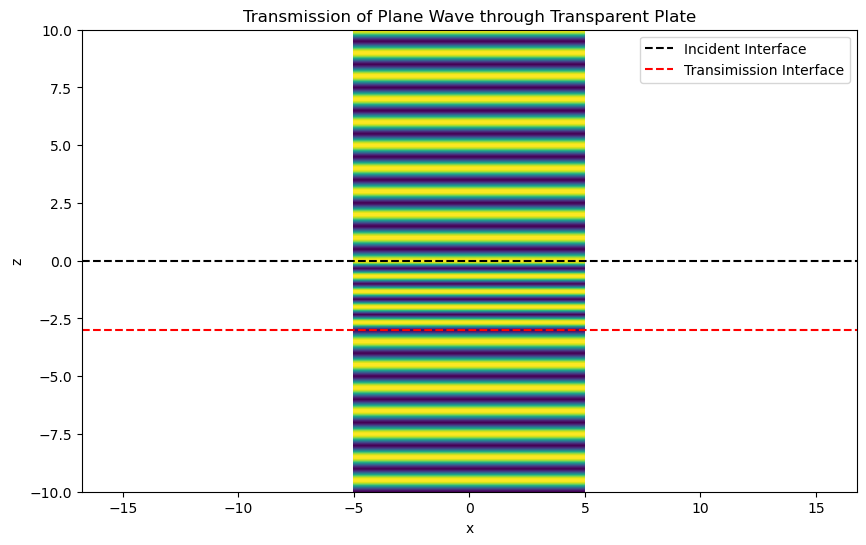

In [33]:
# Parameters for the wave
k_0 = 2 * np.pi  # Wave number in vacuum (assuming wavelength λ=1)
omega = 2 * np.pi  # Angular frequency (assuming period T=1)
n1 = 1.0  # Refractive index of medium 1 (air)
n2 = 1.5  # Refractive index of the plate (glass)
d = 3.0  # Thickness of the plate
A = 1.0  # Amplitude of the incident wave

# Transmission coefficient (amplitude transmittance)
t = np.exp(1j * n2 * k_0 * d)

# Define the incident wave function
def incident_wave(x, z, t, A, kx, kz, omega):
    return A * np.exp(1j * (kx * x + kz * z - omega * t))

# Define the wave function inside the plate (refraction)
def plate_wave(x, z, t, A, kx, kz, omega, n2):
    kx2 = kx
    kz2 = k_0 * n2 * np.cos(0)  # For normal incidence
    return A * np.exp(1j * (kx2 * x + kz2 * z - omega * t))

# Define the transmitted wave function
def transmitted_wave(U_inc, t):
    return U_inc * t

# Define the spatial domain
x = np.linspace(-5, 5, 500)
z = np.linspace(-10, 10, 500)
X, Z = np.meshgrid(x, z)

# Define the time
t_val = 0  # Time

# Wave vector components for the incident wave (normal incidence)
kx = k_0 * n1 * np.sin(0)
kz = k_0 * n1 * np.cos(0)

# Calculate the incident wave
U_inc = incident_wave(X, Z, t_val, A, kx, kz, omega)

# Calculate the wave inside the plate
U_plate = plate_wave(X, Z, t_val, A, kx, kz, omega, n2)

# Calculate the transmitted wave
U_trans = transmitted_wave(U_inc, t)

# Define regions: incident (Z >= d), plate (-d <= Z < d), transmission (Z < -d)
U_total = np.zeros_like(X, dtype=complex)
U_total[Z >= 0] = U_inc[Z >= 0]
U_total[(Z < 0) & (Z >= -d)] = U_plate[(Z < 0) & (Z >= -d)]
U_total[Z < -d] = U_trans[Z < -d]

# Plot the real part of the total wave
plt.figure(figsize=(10, 6))
plt.contourf(X, Z, np.real(U_total), levels=100, cmap='viridis')

# Add dashed lines for the interfaces
plt.axhline(y=0, color='k', linestyle='--', label='Incident Interface')
plt.axhline(y=-d, color='r', linestyle='--', label='Transimission Interface')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Transmission of Plane Wave through Transparent Plate')
plt.legend()
plt.axis('equal')
plt.show()


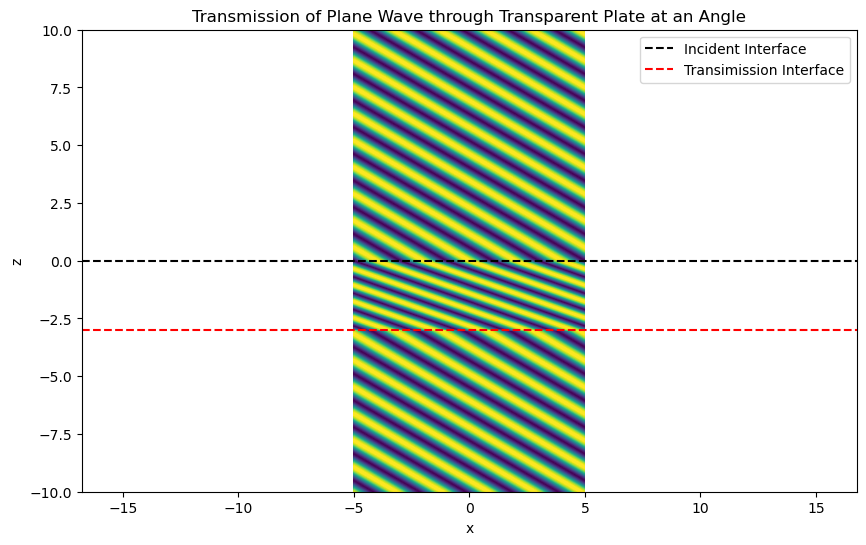

In [34]:
theta_1 = np.pi / 6  # Angle of incidence (30 degrees)

# Calculate the refraction angle using Snell's law
sin_theta_2 = n1 * np.sin(theta_1) / n2
theta_2 = np.arcsin(sin_theta_2)

# Transmission coefficient (amplitude transmittance)
t = np.exp(1j * n2 * k_0 * d * np.sqrt(1 - (n1 / n2 * np.sin(theta_1))**2))

# Define the wave function inside the plate (refraction)
def plate_wave(x, z, t, A, kx, kz, omega, n2, theta_2):
    kx2 = k_0 * n2 * np.sin(theta_2)
    kz2 = k_0 * n2 * np.cos(theta_2)
    return A * np.exp(1j * (kx2 * x + kz2 * z - omega * t))

# Define the spatial domain
x = np.linspace(-5, 5, 500)
z = np.linspace(-10, 10, 500)
X, Z = np.meshgrid(x, z)

# Define the time
t_val = 0  # Time

# Wave vector components for the incident wave
kx = k_0 * n1 * np.sin(theta_1)
kz = k_0 * n1 * np.cos(theta_1)

# Calculate the incident wave
U_inc = incident_wave(X, Z, t_val, 1, kx, kz, omega)

# Calculate the wave inside the plate
U_plate = plate_wave(X, Z, t_val, 1, kx, kz, omega, n2, theta_2)

# Calculate the transmitted wave
U_trans = transmitted_wave(U_inc, t)

# Define regions: incident (Z >= d), plate (-d <= Z < d), transmission (Z < -d)
U_total = np.zeros_like(X, dtype=complex)
U_total[Z >= 0] = U_inc[Z >= 0]
U_total[(Z < 0) & (Z >= -d)] = U_plate[(Z < 0) & (Z >= -d)]
U_total[Z < -d] = U_trans[Z < -d]

# Plot the real part of the total wave
plt.figure(figsize=(10, 6))
plt.contourf(X, Z, np.real(U_total), levels=100, cmap='viridis')

# Add dashed lines for the interfaces
plt.axhline(y=0, color='k', linestyle='--', label='Incident Interface')
plt.axhline(y=-d, color='r', linestyle='--', label='Transimission Interface')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Transmission of Plane Wave through Transparent Plate at an Angle')
plt.legend()
plt.axis('equal')
plt.show()

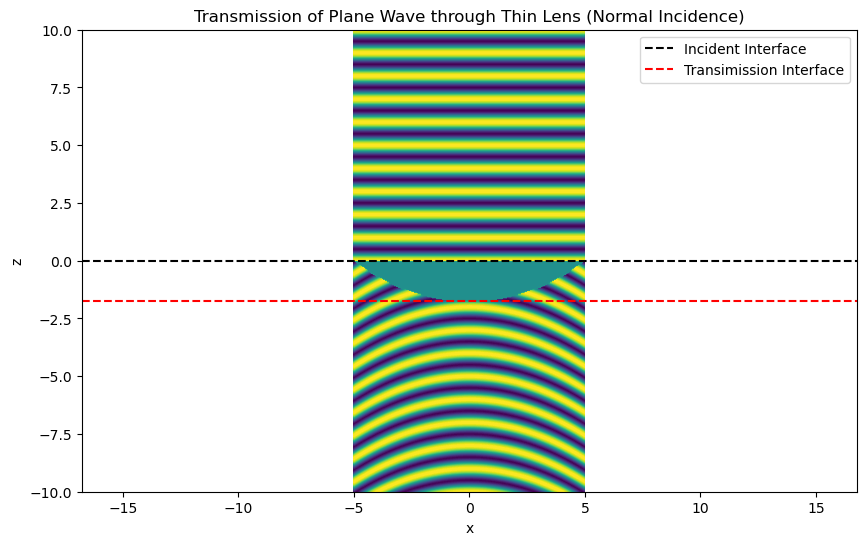

In [36]:
# Parameters for the lens
f = 8.0  # Focal length of the lens
h_0 = 1.0  # Amplitude constant for the lens transmission function
A = 1.0  # Amplitude of the incident wave
d = 1.75  # Thickness of the plate

# Define the transmission function of the thin lens
def lens_transmission(x, y, k_0, f):
    return h_0 * np.exp(1j * k_0 * (x**2 + y**2) / (2 * f))

# Define the spatial domain
x = np.linspace(-5, 5, 500)
z = np.linspace(-10, 10, 500)
X, Z = np.meshgrid(x, z)

# Define the time
t_val = 0  # Time

# Wave vector components for the incident wave (assuming normal incidence)
kx = k_0 * np.sin(0)
kz = k_0 * np.cos(0)
omega = 2 * np.pi  # Angular frequency

# Calculate the incident wave
U_inc = incident_wave(X, Z, t_val, A, kx, kz, omega)

arc_z = -np.sqrt(f**2 - X**2) + f - d

# Mask for the plate region

# Apply the thin lens transmission function
# Lens is located at z = 0 and the thickness is d
U_lens = np.copy(U_inc)
U_lens = U_inc * lens_transmission(X, 0, k_0, f)

# Create the combined plot
U_total = np.zeros_like(X, dtype=complex)
U_total[Z > 0] = U_inc[Z > 0]  # Incident region
U_total[Z < arc_z] = U_lens[Z < arc_z]  # Transmission region

# Plot the real part of the combined wave (incident and transmitted)
plt.figure(figsize=(10, 6))
plt.contourf(X, Z, np.real(U_total), levels=100, cmap='viridis')

# Add dashed lines for the interfaces
plt.axhline(y=0, color='k', linestyle='--', label='Incident Interface')
plt.axhline(y=-d, color='r', linestyle='--', label='Transimission Interface')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Transmission of Plane Wave through Thin Lens (Normal Incidence)')
plt.legend()
plt.axis('equal')
plt.show()

# Interface
# Interface of two plane waves in same direction

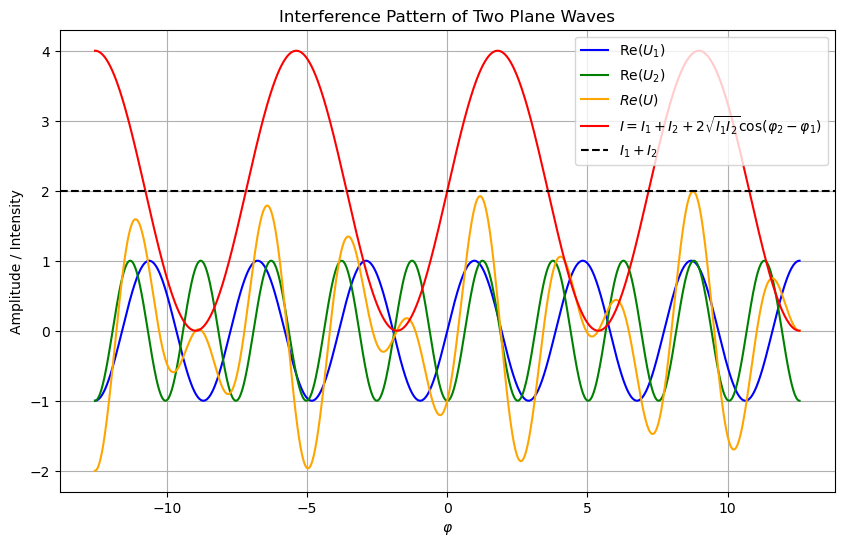

In [50]:
# Define the intensities and phases of the two waves
I1 = 1.0
I2 = 1.0
phi1 = np.linspace(-5 * np.pi, 8 * np.pi, 1000)
phi2 = np.linspace(-5 * np.pi, 15 * np.pi, 1000)

# Calculate the complex amplitudes of the two waves
U1 = np.sqrt(I1) * np.exp(1j * (phi1))
U2 = np.sqrt(I2) * np.exp(1j * (phi2))
U = U1 + U2

# Calculate the interference intensity
I = I1 + I2 + 2 * np.sqrt(I1 * I2) * np.cos(phi2 - phi1)

# Plot the real parts of U1 and U2
plt.figure(figsize=(10, 6))
plt.plot(phi, np.real(U1), label=r'Re$(U_1)$', color='blue')
plt.plot(phi, np.real(U2), label=r'Re$(U_2)$', color='green')
plt.plot(phi, np.real(U), label=r'$Re(U)$', color='orange')
# Plot the interference intensity
plt.plot(phi, I, label=r'$I = I_1 + I_2 + 2 \sqrt{I_1 I_2} \cos(\varphi_2 - \varphi_1)$', color='red')
plt.axhline(y=I1 + I2, color='k', linestyle='--', label=r'$I_1 + I_2$')

# Add labels and title
plt.xlabel(r'$\varphi$')
plt.ylabel(r'Amplitude / Intensity')
plt.title('Interference Pattern of Two Plane Waves')
plt.legend()
plt.grid(True)
plt.show()

# Interface of two oblique plane waves

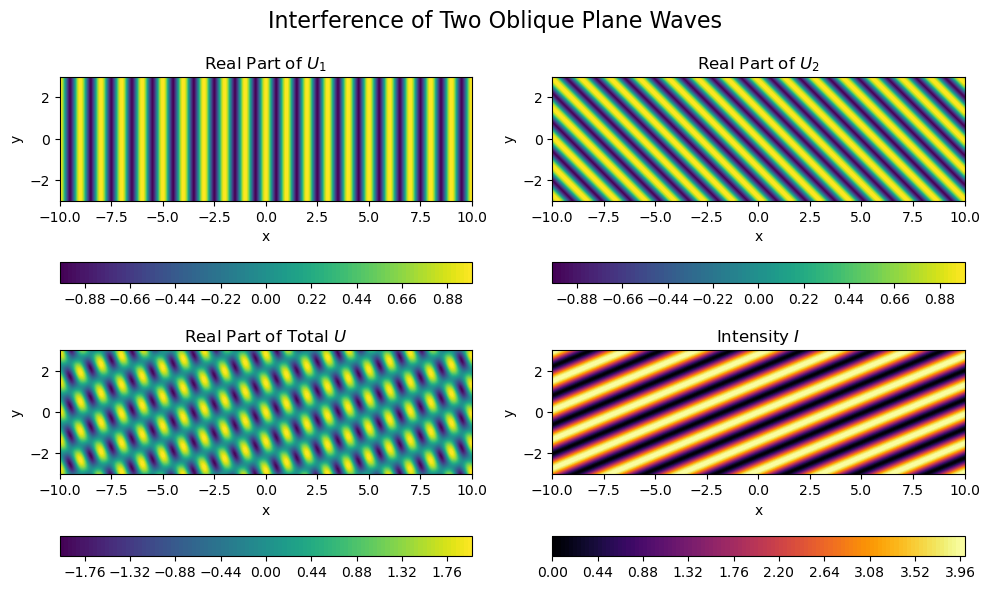

In [72]:
# Define angles of propagation (in radians)
theta1 = 0 # np.pi / 6  # 30 degrees for wave 1
theta2 = np.pi / 4  # 45 degrees for wave 2

# Define the wave vectors
kx1 = k0 * np.cos(theta1)
ky1 = k0 * np.sin(theta1)
kx2 = k0 * np.cos(theta2)
ky2 = k0 * np.sin(theta2)

# Define the spatial domain
x = np.linspace(-10, 10, 500)
y = np.linspace(-3, 3, 150)
X, Y = np.meshgrid(x, y)

# Define the incident wave functions
U1 = np.sqrt(I1) * np.exp(1j * (kx1 * X + ky1 * Y))
U2 = np.sqrt(I2) * np.exp(1j * (kx2 * X + ky2 * Y))

# Calculate the total wave function
U = U1 + U2

# Calculate the intensity
I = np.abs(U)**2

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot the real part of U1
contour1 = axs[0, 0].contourf(X, Y, np.real(U1), levels=100, cmap='viridis')
fig.colorbar(contour1, ax=axs[0, 0], orientation='horizontal')
axs[0, 0].set_title('Real Part of $U_1$')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('y')
axs[0, 0].axis('scaled')

# Plot the real part of U2
contour2 = axs[0, 1].contourf(X, Y, np.real(U2), levels=100, cmap='viridis')
fig.colorbar(contour2, ax=axs[0, 1], orientation='horizontal')
axs[0, 1].set_title('Real Part of $U_2$')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('y')
axs[0, 1].axis('scaled')

# Plot the real part of the total wave U
contour3 = axs[1, 0].contourf(X, Y, np.real(U), levels=100, cmap='viridis')
fig.colorbar(contour3, ax=axs[1, 0], orientation='horizontal')
axs[1, 0].set_title('Real Part of Total $U$')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('y')
axs[1, 0].axis('scaled')

# Plot the intensity I
contour4 = axs[1, 1].contourf(X, Y, I, levels=100, cmap='inferno')
fig.colorbar(contour4, ax=axs[1, 1], orientation='horizontal')
axs[1, 1].set_title('Intensity $I$')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('y')
axs[1, 1].axis('scaled')

plt.suptitle('Interference of Two Oblique Plane Waves', fontsize=16)
plt.tight_layout()
plt.show()

# Interference of Spherical Waves
## Interference of Two Spherical Waves

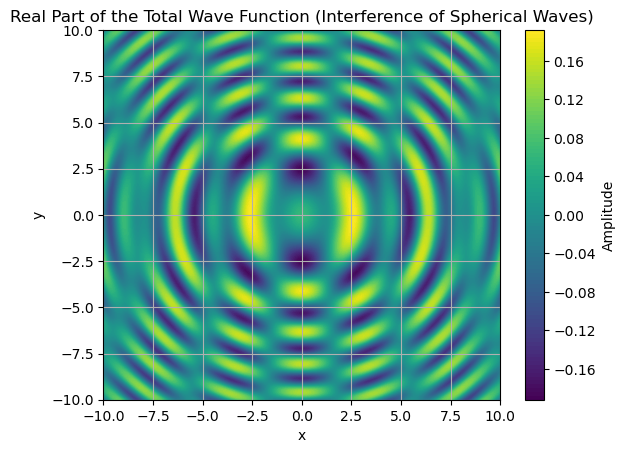

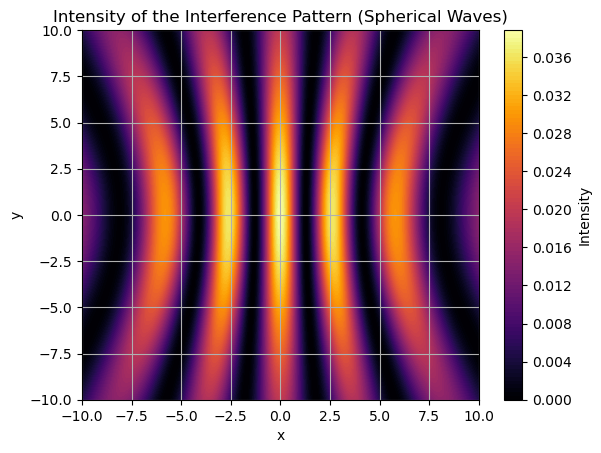

In [280]:
# Parameters
a = 2.0  # Separation of the sources
d = 10.0  # Distance to the observation plane
wavelength = 1.0  # Wavelength of the waves
k = 2 * np.pi / wavelength  # Wave number
A = 1.0  # Amplitude
omega = 2 * np.pi  # Angular frequency

# Define the spherical wave function
def spherical_wave(r, t, A, k, omega):
    return (A / r) * np.exp(1j * (omega * t - k * r))

# Define the spatial domain
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)
z = d  # Observation plane at z = d
X, Y = np.meshgrid(x, y)

# Calculate the distance from the two sources to each point in the grid
r1 = np.sqrt((X - a)**2 + Y**2 + z**2)
r2 = np.sqrt((X + a)**2 + Y**2 + z**2)

# Calculate the wave functions from the two sources at t = 0
U1 = spherical_wave(r1, 0, A, k, omega)
U2 = spherical_wave(r2, 0, A, k, omega)

# Calculate the total wave function
U_total = U1 + U2

# Calculate the intensity pattern
I = np.abs(U_total)**2

# Plot the real part of the total wave function
plt.figure()
plt.contourf(X, Y, np.real(U_total), levels=100, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Part of the Total Wave Function (Interference of Spherical Waves)')
plt.grid(True)
plt.show()

# Plot the intensity pattern
plt.figure()
plt.contourf(X, Y, I, levels=100, cmap='inferno')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intensity of the Interference Pattern (Spherical Waves)')
plt.grid(True)
plt.show()

## Interference of Four Spherical Waves

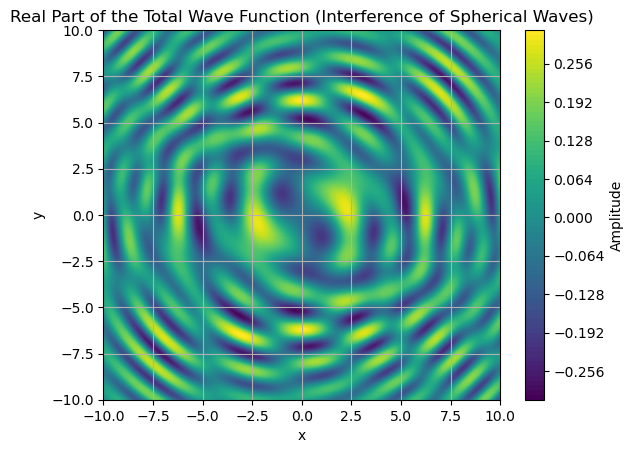

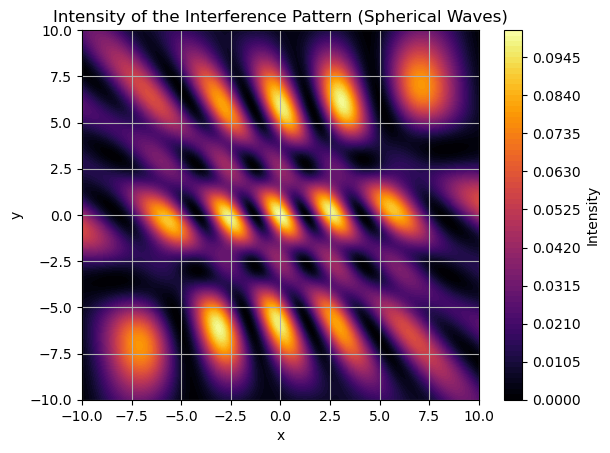

In [281]:
r3 = np.sqrt((X + a)**2 + (Y + a)**2 + z**2)
r4 = np.sqrt((X +- a)**2 + (Y - a)**2 + z**2)

U3 = spherical_wave(r3, 0, A, k, omega)
U4 = spherical_wave(r4, 0, A, k, omega)
# Calculate the total wave function
U_total = U1 + U2 + U3 + U4

# Calculate the intensity pattern
I = np.abs(U_total)**2

# Plot the real part of the total wave function
plt.figure()
plt.contourf(X, Y, np.real(U_total), levels=100, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Real Part of the Total Wave Function (Interference of Spherical Waves)')
plt.grid(True)
plt.show()

# Plot the intensity pattern
plt.figure()
plt.contourf(X, Y, I, levels=100, cmap='inferno')
plt.colorbar(label='Intensity')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intensity of the Interference Pattern (Spherical Waves)')
plt.grid(True)
plt.show()

# Interference of Multiple Plane Waves with Constant Phase Differences

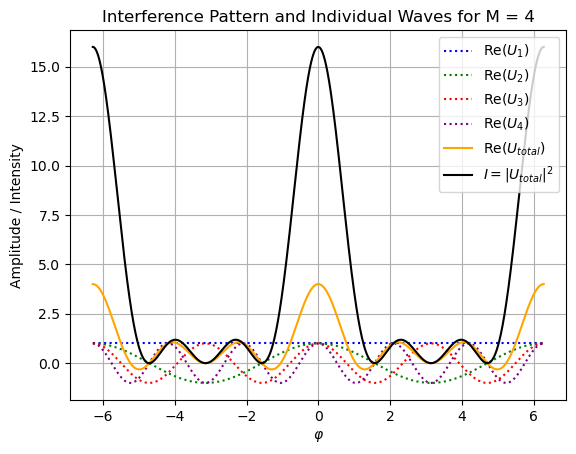

In [251]:
# Parameters
I0 = 1.0  # Reference intensity
phi = np.linspace(-2 * np.pi, 2 * np.pi, 1000)  # Phase difference range
M = 4  # Number of plane waves

# Calculate individual wave components
Um = [np.sqrt(I0) * np.exp(1j * (m - 1) * phi) for m in range(1, M + 1)]

# Sum the components to find the total wave
U_total = np.sum(Um, axis=0)

# Calculate the intensity
I = np.abs(U_total)**2

# Plotting
plt.figure()

# Plot individual waves
colors = ['blue', 'green', 'red', 'purple']
for m in range(M):
    plt.plot(phi, np.real(Um[m]), label=f'Re$(U_{m+1})$', color=colors[m], linestyle=':')

# Plot total wave
plt.plot(phi, np.real(U_total), label='Re$(U_{total})$', color='orange')

# Plot intensity
plt.plot(phi, I, label=r'$I = |U_{total}|^2$', color='black')

# Add labels and title
plt.xlabel(r'$\varphi$')
plt.ylabel('Amplitude / Intensity')
plt.title(f'Interference Pattern and Individual Waves for M = {M}')
plt.legend()
plt.grid(True)
plt.show()

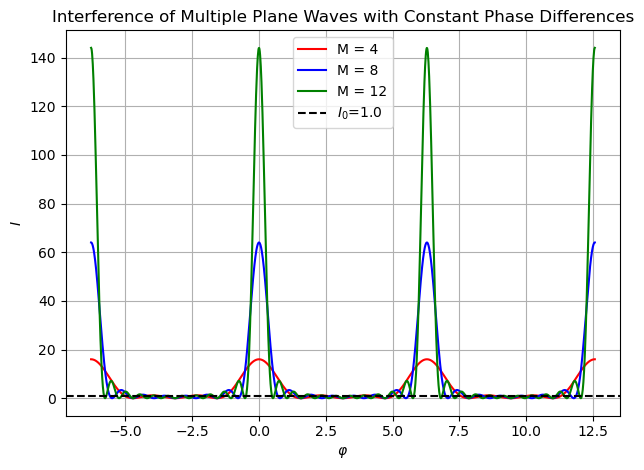

In [261]:
# Parameters
I0 = 1.0  # Reference intensity
phi = np.linspace(-2 * np.pi, 4 * np.pi, 1500)  # Phase difference range

# Function to calculate the intensity for a given M
def calculate_intensity(M, phi, h_magnitude = 1):
    h =  np.exp(1j * phi) * h_magnitude
    if h_magnitude == 1:
        I = I0 * (np.sin(M * phi / 2) / np.sin(phi / 2))**2
    else:
        U = np.sqrt(I0) * (1 - h**M) / (1 - h)
        I = np.abs(U)**2
    return I
    
# Plot the intensity patterns
plt.figure()

I_M = calculate_intensity(4, phi)
plt.plot(phi, I_M, label='M = 4', color='red')

I_M = calculate_intensity(8, phi)
plt.plot(phi, I_M, label='M = 8', color='blue')

I_M = calculate_intensity(12, phi)
plt.plot(phi, I_M, label='M = 12', color='green')
plt.axhline(y=I0, color='k', linestyle='--', label=r'$I_0$={:.1f}'.format(I0))
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$I$')
plt.title('Interference of Multiple Plane Waves with Constant Phase Differences')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

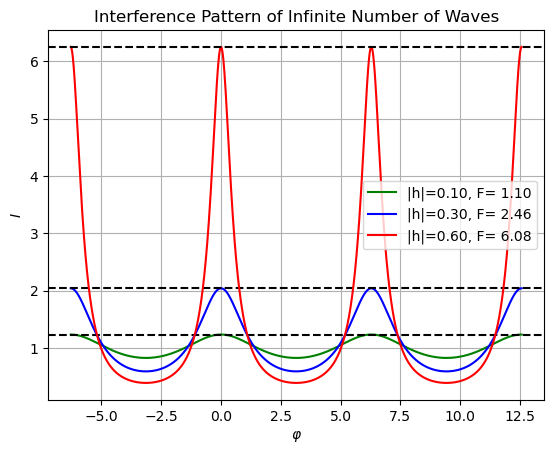

In [263]:
# Parameters
I0 = 1.0  # Reference intensity
phi = np.linspace(-2 * np.pi, 4 * np.pi, 1500)  # Phase difference range

def calculate_intensity_infinite (phi,h_magnitude):
    F = (np.pi * np.sqrt(h_magnitude)) / (1 - h_magnitude)
    I_max = I0 / (1 - h_magnitude)**2
    I = I_max / (1 + (2 * F / np.pi)**2 * np.sin(phi / 2)**2)
    return F,I_max,I

# Plot the intensity pattern
plt.figure()
h_magnitude = 0.1
F,I_max,I = calculate_intensity_infinite (phi,h_magnitude)
plt.plot(phi, I, label='|h|={:.2f}, F= {:.2f}'.format(h_magnitude,F), color='g')
plt.axhline(y=I_max, color='k', linestyle='--')


h_magnitude = 0.3
F,I_max,I = calculate_intensity_infinite (phi,h_magnitude)
plt.plot(phi, I, label='|h|={:.2f}, F= {:.2f}'.format(h_magnitude,F), color='b')
plt.axhline(y=I_max, color='k', linestyle='--')

h_magnitude = 0.6
F,I_max,I = calculate_intensity_infinite (phi,h_magnitude)
plt.plot(phi, I, label='|h|={:.2f}, F= {:.2f}'.format(h_magnitude,F), color='r')
plt.axhline(y=I_max, color='k', linestyle='--')


# Add labels and title
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$I$')
plt.title('Interference Pattern of Infinite Number of Waves')
plt.legend()
plt.grid(True)
plt.show()

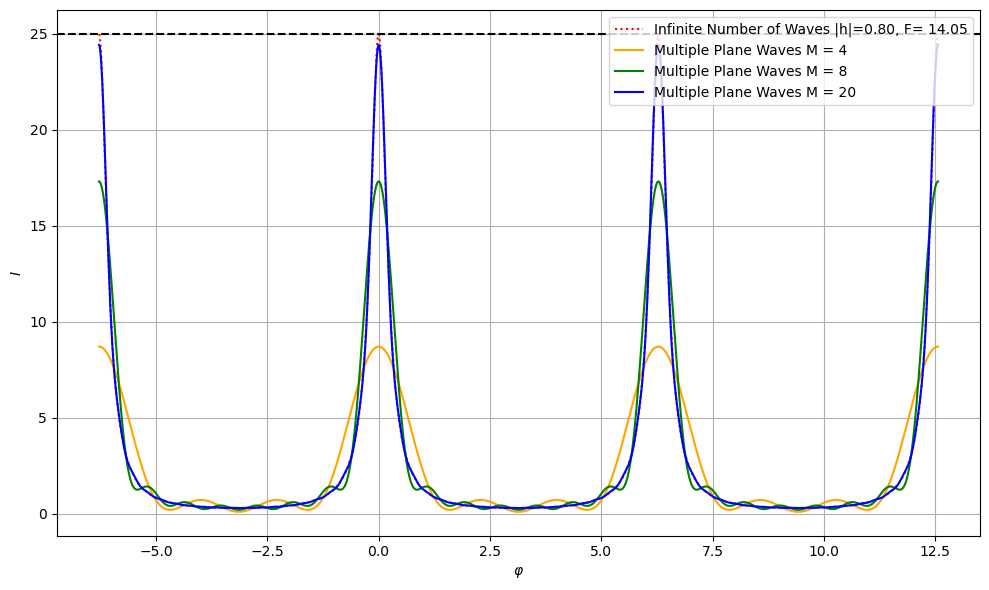

In [283]:
h_magnitude = 0.8

# Plot the intensity patterns
plt.figure(figsize=(10, 6))

F,I_max,I = calculate_intensity_infinite (phi,h_magnitude)
plt.plot(phi, I, label='Infinite Number of Waves |h|={:.2f}, F= {:.2f}'.format(h_magnitude,F), color='r', linestyle=':')
plt.axhline(y=I_max, color='k', linestyle='--')

M = 4
I_M = calculate_intensity(M, phi, h_magnitude)
plt.plot(phi, I_M, label='Multiple Plane Waves M = {:d}'.format(M), color='orange')

M = 8
I_M = calculate_intensity(M, phi, h_magnitude)
plt.plot(phi, I_M, label='Multiple Plane Waves M = {:d}'.format(M), color='g')

M = 20
I_M = calculate_intensity(M, phi, h_magnitude)
plt.plot(phi, I_M, label='Multiple Plane Waves M = {:d}'.format(M), color='b')



plt.xlabel(r'$\varphi$')
plt.ylabel(r'$I$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()